<img src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Uexternado.jpg" width="240" height="240" align="right"/>

# Modelos Supervisados

## Modelo KNN

Andrés Martínez<br>
Junio 2024

## Clasificación

Recuerde que en **regresión**, tratamos de predecir una variable de valor real (cuantitativa). Ejemplos:
* Predecir los precios de la vivienda en función de los atributos
* Predecir la calificación de puntaje de crédito en función de los ingresos, el saldo, el género, la educación, etc.

En **clasificación**, tratamos de predecir una variable categórica (cualitativa). Ejemplos:
* Predecir si un banco debe emitir una tarjeta de crédito a una persona (sí/no)
* Predecir el diagnóstico de un paciente hospitalario (ictus, infarto,...) en base a los síntomas.

Suponemos un conjunto de datos con $n$ muestras $(x_1,y_1), (x_2,y_2),\ldots,(x_n,y_n)$, donde $x_i$ son atributos o características y $y_i$ son variables categóricas que desea para predecir

Nuestro objetivo es desarrollar una regla para predecir la variable categórica $y$ basada en las características $x$.

Por ejemplo, ¿podemos predecir si un estudiante será admitido o no en un programa de posgrado en función de su rendimiento de pregrado.

O, por ejemplo, la oficina de correos utiliza la clasificación de códigos postales escritos a mano para clasificar automáticamente el correo. Se fotografían los dígitos del código postal, la imagen sirve como vector de datos y luego se asigna la imagen a una de las *clases:* $0,1,2,\ldots,9$.

En las próximas conferencias, cubriremos varios métodos de clasificación:
* k-vecinos más cercanos
* árboles y bosques al azar
* Regresión logística
* máquinas de vectores de soporte (SVM)


Veremos que las redes neuronales se pueden usar tanto para la regresión como para la clasificación.

Hoy cubriremos k-vecinos más cercanos y árboles de decisión.

## Clasificación: k vecinos más cercanos

El algoritmo KNN – Paso a paso
Cómo clasifica KNN una nueva entrada de datos:
1. Cargar todos los datos de entrenamiento
2. Utilice un valor preestablecido de k (sólo enteros)
3. Calcular la distancia entre la entrada de datos de prueba y cada valor de los datos de entrenamiento
4. Ordenar según nuestras distancias (ascendente, es decir, la distancia más pequeña a la mayor distancia)
5. Elija las filas K superiores de los datos ordenados
6. Asignar la clase a nuestros datos de entrada a la clase más frecuente de nuestras filas K


KNN es uno de los algoritmos de aprendizaje automático más populares, ya que ofrece un rendimiento algo decente y también es bastante fácil de entender e implementar.

Se denomina como un algoritmo perezoso porque no tiene una fase de entrenamiento, lo que hace en su lugar es calcular la clasificación utilizando los datos de entrenamiento. Esto también lo convierte en un algoritmo no paramétrico.

## K–Vecinos más cercanos (k-NN)

**Idea:** Para decidir la clase de un punto dado, encuentre los k vecinos más cercanos de ese punto y déjelos "votar" en la clase. Es decir, asignamos la clase a la muestra que es más común entre sus k vecinos más cercanos.

**Consideraciones:**
* Debemos elegir k, el número de vecinos votantes (típicamente un número pequeño, digamos k=10)
* 'Nearest' significa más cercano en distancia, por lo que hay cierta flexibilidad para definir la distancia
* Hay diferentes formas de votar. Por ejemplo, de los k vecinos más cercanos, podría dar más peso a los más cercanos que a los más lejanos.
* Tenemos que decidir cómo desempatar en la votación.

Inicialmente, aplicaremos el método de k vecinos más cercanos. También consideraremos un ejemplo sencillo.

## Distancias 

euclidiana: $$ d_{euc} =(x,y) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2} $$

Manhattan: $$ d_{man} (x,y) = \sum_{i=1}^{n} \mid (x_i - y_i) \mid $$

Chebyshev: $$d_{chev} (x,y) = max(\mid x_i - y_i \mid)$$

Minkowski: $$ d_{min} (x,y) = (\sum_{i=1}^{n} \mid x_i - y_i) \mid^p)^{1/p}$$

Donde $ p$ es un entero entre dos puntos tipicamente es 1 o  2 


Classes: ['gray', 'white', 'white']
Classification: white


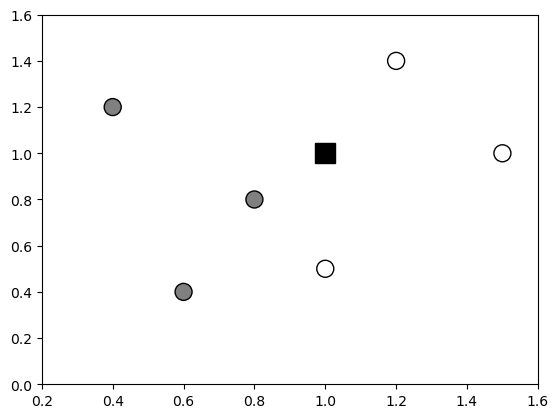

In [2]:
from scipy.spatial import distance
import statistics
import matplotlib.pyplot as plt
import numpy as np

def knn(x_train, y_train, x_test, k):
    distances = [] #lista que almacena las distancias
    x1 = x_test # elemento a ser classificado
    for x2 in x_train: # distancia entre elementos observados de un conjunto de test
        dist = distance.euclidean(x1,x2)
        distances.append(dist)
    indices = []
    cl = []
    for i in range(0,k):
        ind = np.argmin(distances) #elemento de un conjunto de test más próximo
        #print('distance:', distances[ind],'index:', ind, 'class:', y_train[ind])
        distances[ind] = np.max(distances) 
        indices.append(ind)
        cl.append(y_train[ind]) #guarda a classe
    print("Classes:",cl)
    classification = statistics.mode(cl)# encontra a classe
    return classification

k=3 # numero de vizinhos
x_train = np.array([[1,0.5],[0.8,0.8],[1.2,1.4],[0.6,0.4],[0.4,1.2],[1.5,1]])
y_train = np.array(['white','gray','white','gray','gray','white'], dtype = 'str')
x_test = np.array([1,1])
# realiza la clasificación
cl = knn(x_train, y_train, x_test, k)
print("Classification:", cl)
# mostra os dados
plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="black")
plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('knn.eps')

plt.show(True)

La región de separación definida por el algoritmo forma células de Voronoi, como se muestra a continuación.

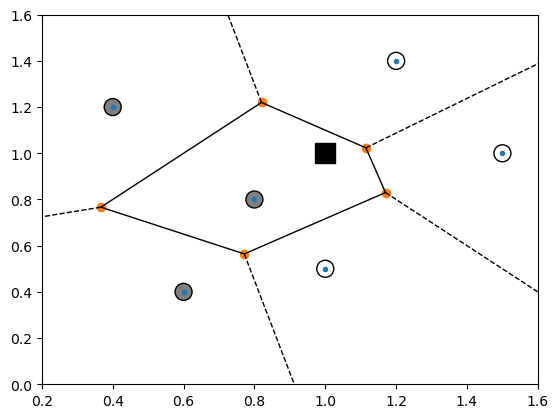

In [3]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(x_train)
voronoi_plot_2d(vor)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="black")

plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.savefig('voronoi.eps')
plt.show()

## Región de decisión


Selecionando dois atributos, podemos visualizar una región de decisión. Para graficar la região de separación, precisamos se debe instalar un  bibliteca mlxtend: http://rasbt.github.io/mlxtend/installation/<br>


Para el método de k vecinos más cercanos:

In [7]:
##!pip3 install mlxtend

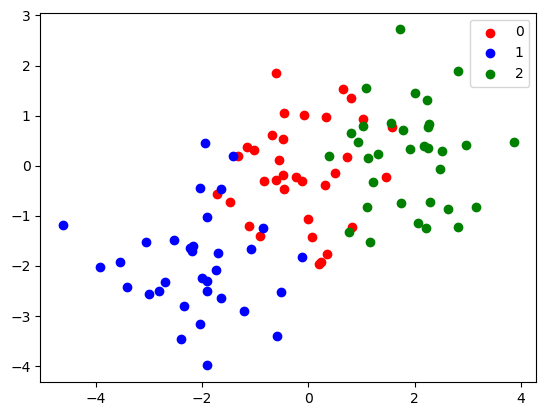

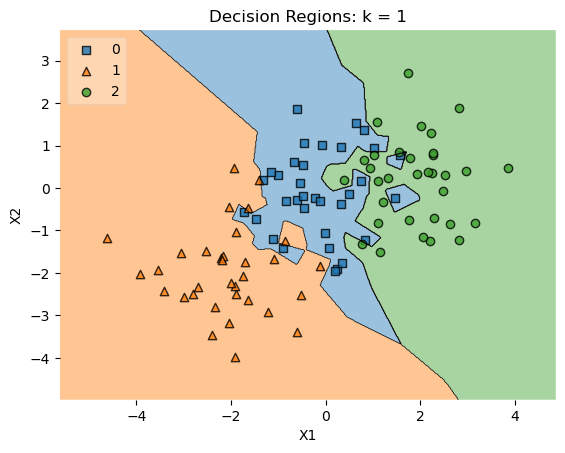

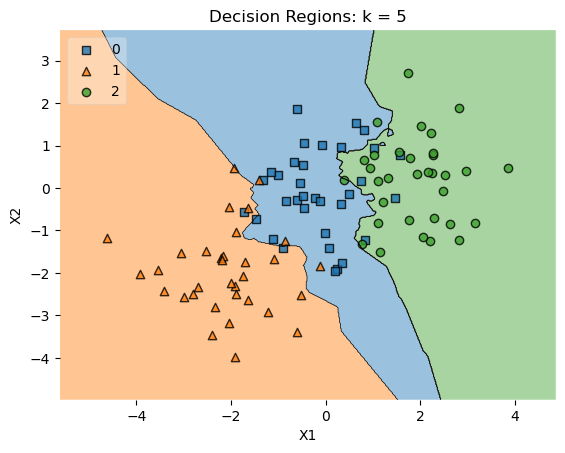

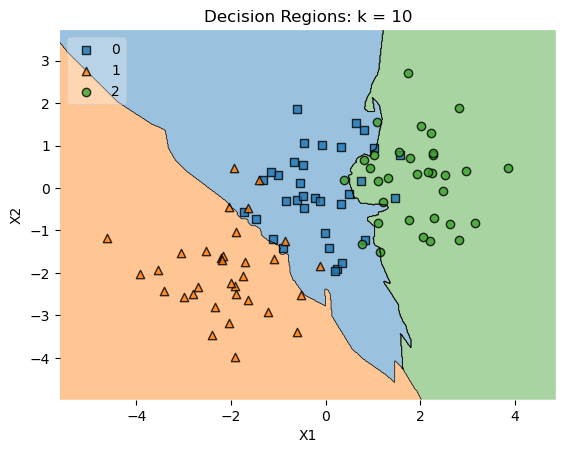

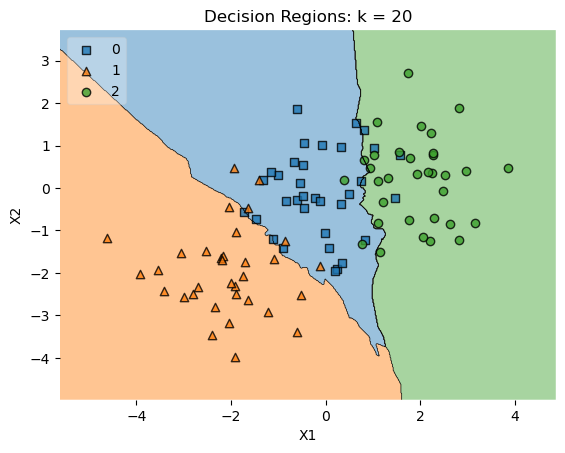

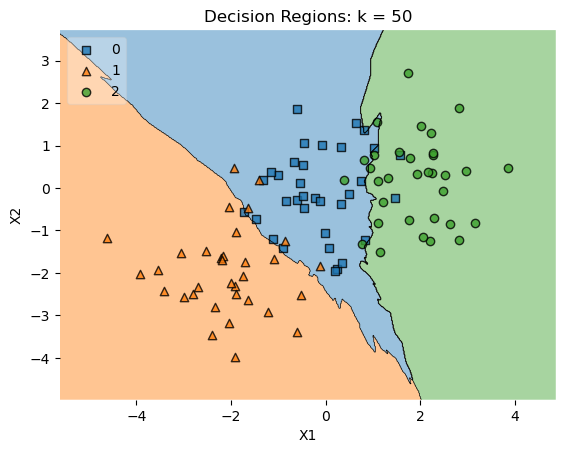

In [8]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame


n_samples = 100 

centers = [(0, 0), (-2, -2), (2,0)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)


d = np.column_stack((X,np.transpose(y)))

data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)


colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.savefig('knn_ex.eps')
plt.legend()
plt.show()


vk = [1,5,10,20,int(n_samples/2)]
for k in vk:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: k = '+str(k))
    #plt.savefig('knn_' + str(k)+'.eps')
    plt.show()

## Escoger el mejor  $k$

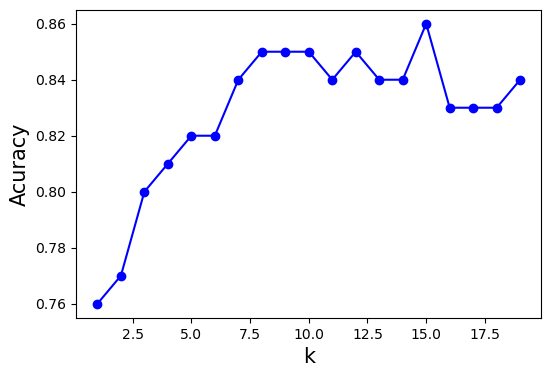

Mejor k: 15


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from pandas import DataFrame
from sklearn.model_selection import cross_validate



n_samples = 100 

centers = [(0, 0), (-2, -2), (2,0)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)


d = np.column_stack((X,np.transpose(y)))
# converte para o formato dataframe do Pandas
data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

nkf = 5 
vk = [] 
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza validación cruzada
    cv = cross_validate(model, X, y, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.figure(figsize=(6,4))
plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Acuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Mejor k:', best_k)

## Métricas

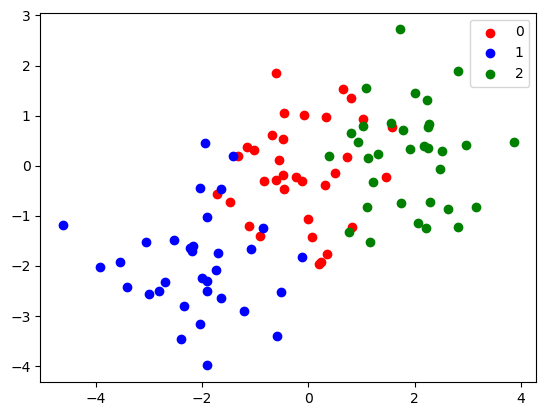

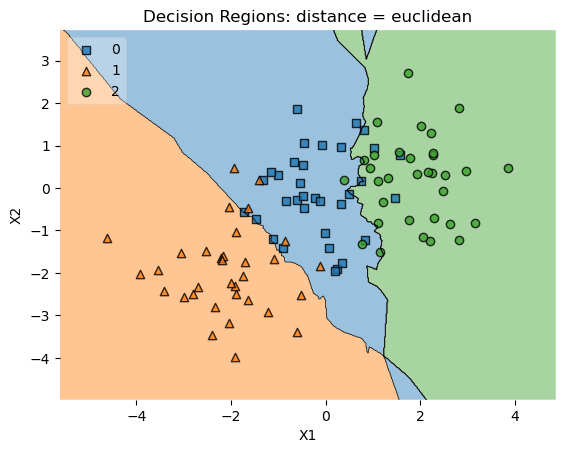

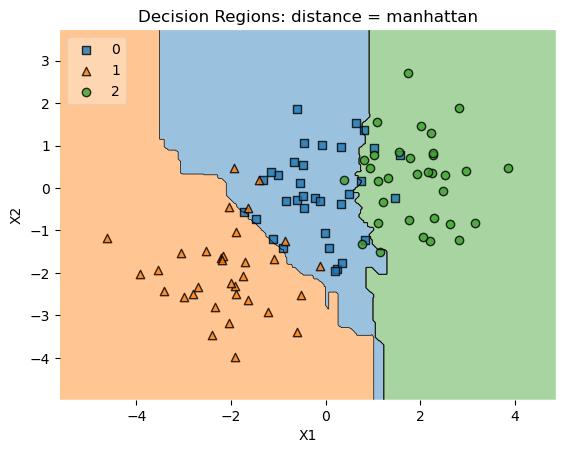

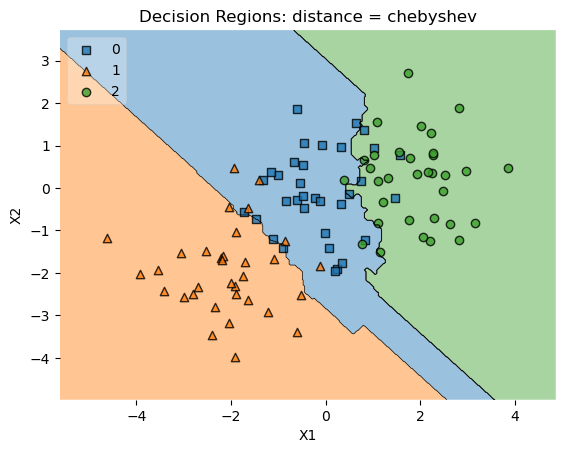

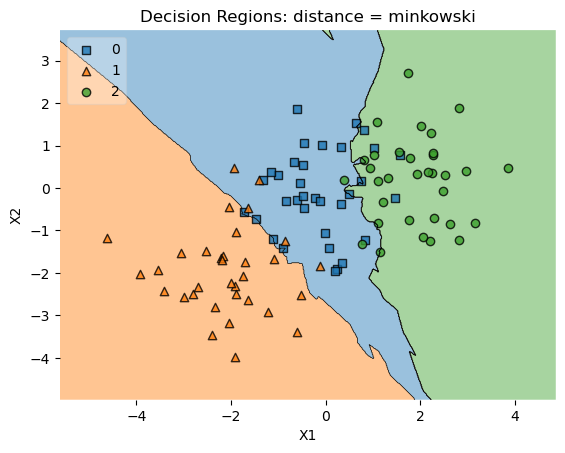

In [10]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
from matplotlib import pyplot
from pandas import DataFrame


n_samples = 100 

centers = [(0, 0), (-2, -2), (2,0)]
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)


d = np.column_stack((X,np.transpose(y)))

data = DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)


colors = ['red', 'blue', 'green', 'black']
aux = 0
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind,0][0], X[ind,1][0], color = colors[aux], label = c)
    aux = aux + 1
plt.legend()
plt.show()

# muestra las regiones separadas para diferentes  valores de k
vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k = 15
for d in vm:
    # Training a classifier
    model = KNeighborsClassifier(n_neighbors=k, metric = d, p=3)
    model.fit(X, y)
    # Plotting decision regions
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Regions: distance = '+ d)
    #plt.savefig('knn_' + str(d)+'.eps')
    plt.show()

## Clasificación de los datos

Leamos inicialmente los datos:

In [11]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
random.seed(42) # define the seed (important to reproduce the results)

data = pd.read_csv('https://raw.githubusercontent.com/Andres1984/Data-Analysis-with-R/master/Bases/winequality-red.csv', header=(0), sep=';')
#data = pd.read_csv('data/winequality-red.csv', header=(0))

data = data.dropna(axis='rows') #remove NaN

classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  

nrow, ncol = data.shape
print("Matriz de atributos: Número de linhas:", nrow, " colunas: ", ncol)
attributes = list(data.columns)
data.head(10)

Matriz de atributos: Número de linhas: 1599  colunas:  12


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Construiremos las variables $X$ e $y$, y el proceso de clasificación se reduce a estimar la función $f$ en la relación $y = f(X) + \epsilon$, donde $\epsilon$ es el error, que tiene distribución normal con media igual a cero y varianza $\sigma^2$.

Hemos convertido los datos a formato Numpy para facilitar su manipulación. 

In [12]:
data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Normalizaremos los datos para evitar el efecto de la escala de atributos.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [14]:
print('Datos transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desviación estándar:', np.std(X, axis = 0))

Datos transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.73268229e-16 -6.22113715e-17  4.44366939e-17 -3.47317200e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desviación estándar: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Para entrenar el clasificador, necesitamos definir el conjunto de prueba y de entrenamiento.

In [15]:
from sklearn.model_selection import train_test_split
p = 0.7 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

A partir de este conjunto de datos, podemos realizar una clasificación.

Vamos a ajustar el modelo. Inicialmente, consideraremos el método de retención para seleccionar el conjunto de prueba y de entrenamiento, que selecciona una fracción p de elementos para el conjunto de prueba y (1-p), para el de entrenamiento. La selección del modelo se realizará posteriormente mediante validación cruzada.

Reenvío de la clasificación por el método de k-neighbour:

In [16]:
from sklearn.neighbors import KNeighborsClassifier
k = 5

model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train,y_train)

y_pred = model.predict(x_test) 

El error en la clasificación puede cuantificarse mediante la medida de precisión.

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.5708333333333333


Nótese que el valor de la precisión depende del número de vecinos $k$. Podemos seleccionar el mejor valor de $k$ utilizando la validación cruzada.

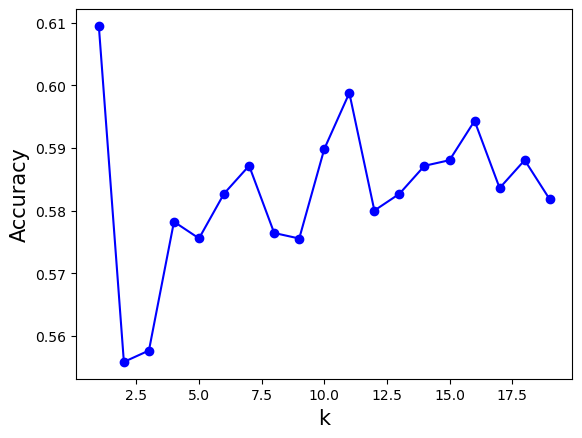

Mejor k: 1


In [18]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier

nkf = 5 #number of folds
vk = [] # armazena os valores de k
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    # realiza a validação cruzada
    cv = cross_validate(model, x_train, y_train, cv=nkf)
    #print('k:', k, 'accurace:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('Mejor k:', best_k)

Utilizando todo el conjunto de entrenamiento, podemos ajustar el modelo y realizar la clasificación en el conjunto de prueba.

In [19]:
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy:', accuracy_score(y_pred, y_test))

Accuracy: 0.625


A continuación se muestra el código completo para la clasificación de la flor del iris.

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = pd.read_csv('https://raw.githubusercontent.com/Andres1984/Data-Analysis-with-R/master/Bases/iris.data.csv', header=(0))
#classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  


data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

p = 0.7 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = p, random_state = 42)

k = 5 
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(X_train,y_train)

y_pred = model.predict(X_test) 

score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.9111111111111111


## Desventajas

Como notado, cada vez que deseamos calcular una nueva entrada, necesitamos cargar todos nuestros datos de entrenamiento, ¡luego calcular las distancias a cada punto! Esto es exhaustivo e impacta negativamente en el rendimiento computacional, sin mencionar el alto uso de memoria que requiere.

También es de destacar que, para que KNN funcione bien, necesitamos normalizar o escalar todos los datos de entrada para que podamos calcular las distancias de manera justa. Las métricas de distancia comunes utilizadas son la distancia euclidiana o la distancia del coseno.

Los conjuntos de datos con un gran número de características afectarán al rendimiento de KNN. Por lo tanto, para evitar el sobreajuste, necesitamos aún más datos para KNN, lo que no siempre es posible (Maldición de la Dimensionalidad).

## Conclusiones

1. k-NN es un método muy simple que se puede utilizar para la clasificación. (¡También se puede usar para la regresión! ¿Cómo?)
2. La precisión del modelo (medida en el conjunto de datos de entrenamiento) y la capacidad de generalización (medida en el conjunto de datos de prueba) son importantes y, a menudo, están en conflicto entre sí.
3. La precisión del modelo se puede medir mediante la matriz de confusión, la precisión, la recuperación, la medida F. La generalizabilidad se puede medir a través de la validación cruzada.
4. La selección de parámetros en los modelos (como k en k-NN) no es trivial, pero se puede realizar mediante validación cruzada.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e39fdd9-54f0-47f6-b432-6e1ff9973ce7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>